# Classifying Flow Regimes using Gas-Liquid Velocities and Logistic Regression

Reference: https://www.emerald.com/insight/content/doi/10.1108/HFF-09-2023-0526/full/html

Khan, U., Pao, W., Pilario, K.E.S., Sallih, N. and Khan, M.R. (2023), "Two-phase flow regime identification using multi-method feature extraction and explainable kernel Fisher discriminant analysis", International Journal of Numerical Methods for Heat & Fluid Flow. doi: 10.1108/HFF-09-2023-0526

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("flow_regime.csv")
df.head()

,Gas_velocity_(m/s),Liq_velocity_(m/s),Flow
0,0.70,0.5,Slug
1,0.80,0.5,Slug
2,1.00,0.5,Slug
3,1.44,0.5,Slug
4,2.00,0.5,Slug


In [3]:
df["Flow2"] = LabelEncoder().fit_transform(df["Flow"])
df.head()

,Gas_velocity_(m/s),Liq_velocity_(m/s),Flow,Flow2
0,0.70,0.5,Slug,1
1,0.80,0.5,Slug,1
2,1.00,0.5,Slug,1
3,1.44,0.5,Slug,1
4,2.00,0.5,Slug,1


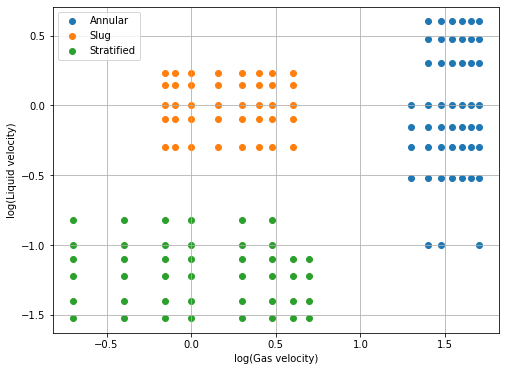

In [4]:
X = np.log10(df.iloc[:,:2].to_numpy())
y = df["Flow2"].to_numpy()

plt.figure(figsize=(8,6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Annular')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Slug')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Stratified')
plt.xlabel("log(Gas velocity)")
plt.ylabel("log(Liquid velocity)")
plt.legend()
plt.grid()
plt.show()

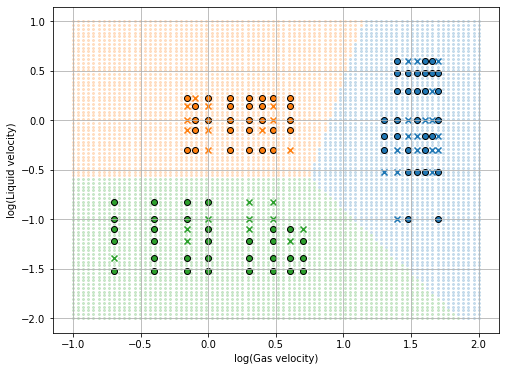

In [5]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the classifier
mdl = LogisticRegression().fit(X_train, y_train)
y_pred = mdl.predict(X_test)

# Plot the decision boundary
plt.figure(figsize=(8,6))
nx, ny = 80, 80
xv, yv = np.meshgrid(np.linspace(-1,2,nx), 
                     np.linspace(-2,1,ny))

xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
grid = np.hstack((xv,yv))
zv = np.zeros(grid.shape[0])
color = ['C0','C1','C2']
for i in range(grid.shape[0]):
    zv[i] = mdl.predict(grid[i,:].reshape(1,-1))
for i in range(3):
    plt.scatter(xv[zv == i],yv[zv == i], color=color[i], alpha=0.2, s=4)
    plt.scatter(X_train[y_train == i,0],X_train[y_train == i,1], color=color[i], marker='o', edgecolor='k')
    plt.scatter(X_test[y_test == i,0],X_test[y_test == i,1], color=color[i], marker='x', edgecolor='k')
    
plt.xlabel("log(Gas velocity)")
plt.ylabel("log(Liquid velocity)")
plt.grid()
plt.show()